In [1]:
import pandas as pd

In [2]:
d=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/vehicles.csv")

In [3]:
d.shape

(426880, 26)

In [4]:
d.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [5]:
d.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

**Drop features that are not required to build our model**

In [6]:
d_1=d.drop(['id', 'url', 'image_url', 'posting_date', 'description', 'VIN', 'region_url'], axis='columns')

# **Data Cleaning- Handle NA values**

In [7]:
d_1.isnull().sum()

region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
size            306361
type             92858
paint_color     130203
county          426880
state                0
lat               6549
long              6549
dtype: int64

We see that in the column County, all values are missing. So we drop this column.

In [8]:
d_2=d_1.drop(['county', 'model'], axis='columns')

In [9]:
d_2

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019.0,nissan,good,6 cylinders,gas,32226.0,clean,other,fwd,NaN,sedan,NaN,wy,33.786500,-84.445400
426876,wyoming,30590,2020.0,volvo,good,NaN,gas,12029.0,clean,other,fwd,NaN,sedan,red,wy,33.786500,-84.445400
426877,wyoming,34990,2020.0,cadillac,good,NaN,diesel,4174.0,clean,other,NaN,NaN,hatchback,white,wy,33.779214,-84.411811
426878,wyoming,28990,2018.0,lexus,good,6 cylinders,gas,30112.0,clean,other,fwd,NaN,sedan,silver,wy,33.786500,-84.445400


In [10]:
d_3=d_2.dropna()

In [11]:
d_3.isna().sum()

region          0
price           0
year            0
manufacturer    0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
lat             0
long            0
dtype: int64

In [12]:
d_3.shape

(79987, 17)

In [13]:
d_3.columns

Index(['region', 'price', 'year', 'manufacturer', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'state', 'lat', 'long'],
      dtype='object')

**Next, we will drop 'lat' and 'long', because they don't contribute much to our model; moreover, we have other features such as region and state which show the location of the car.**

In [14]:
d_4=d_3.drop(['lat', 'long'],axis='columns')

**We form a new column called size-c whcih combines compact and subcompact size**


In [15]:
#first we set d_4['size-c'] equal to d_4['size']
d_4['size-c']=d_4['size']

#next we update the values of the rows whose size value is sub-compact with compact
d_4.loc[d_4['size'] =='sub-compact', 'size-c']='compact'


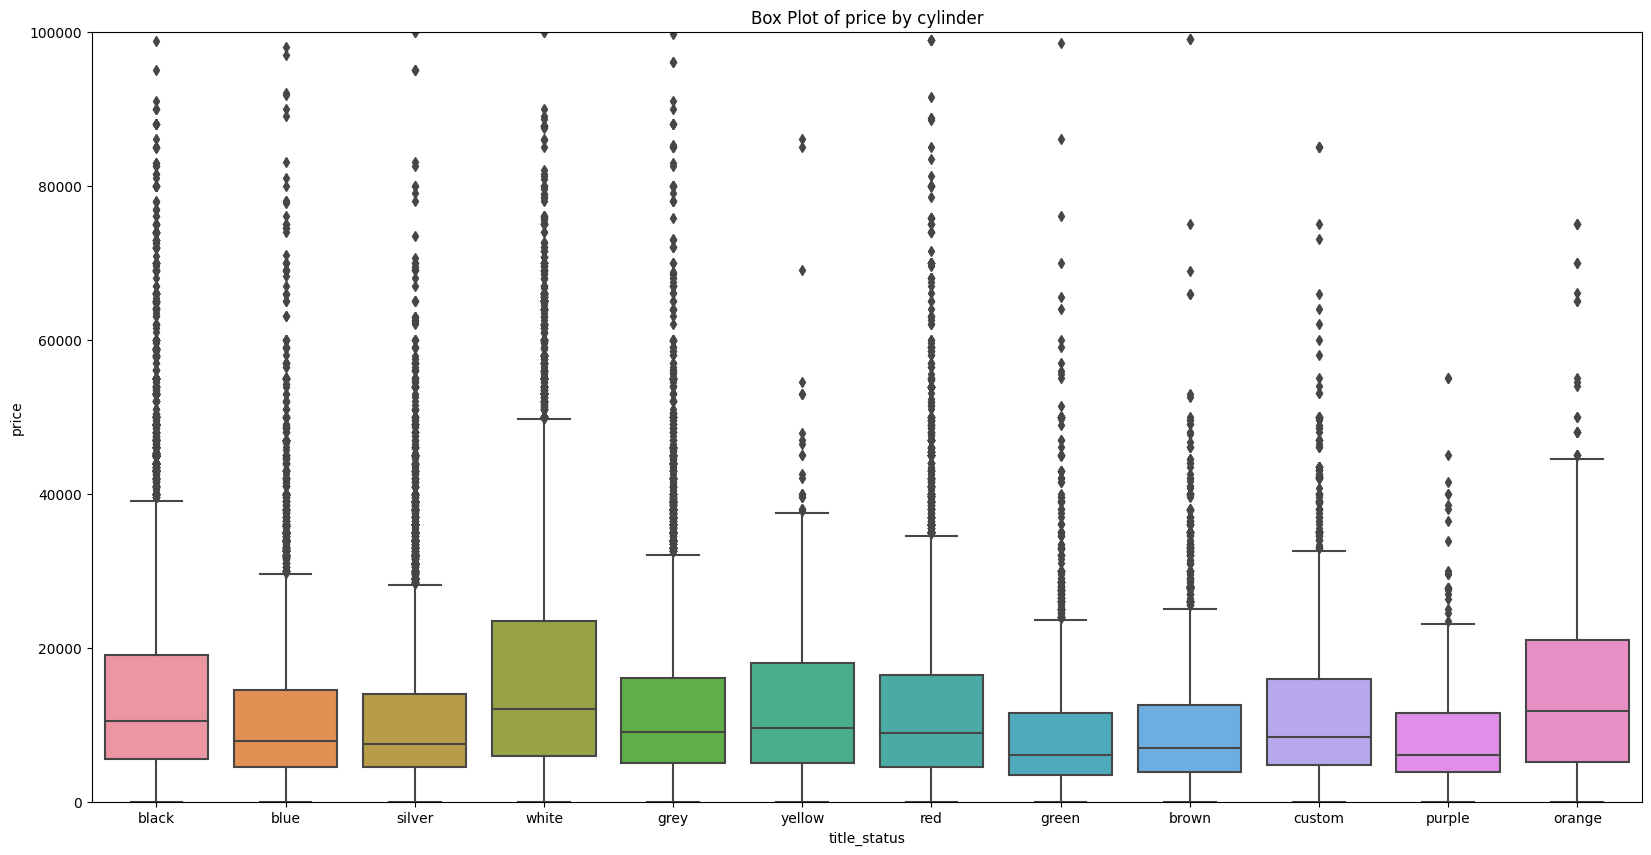

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
# Assuming you have a DataFrame df with two columns: 'Category' and 'Value'
sns.boxplot(x='paint_color', y='price', data=d_4)
plt.ylim(0, 100000)
plt.xlabel('title_status')
plt.ylabel('price')
plt.title('Box Plot of price by cylinder')
plt.show()

**Since it's unlikely that the price of the car is less than 500, we remove the rows for which the value of the price column is less than 500**

In [17]:
d_temp=d_4[d_4['price']<500].index
d_4=d_4.drop(d_temp)


In [18]:
d_temp=d_4[d_4['year']<2001].index
d_4=d_4.drop(d_temp)

In [19]:
d_temp=d_4[(d_4['odometer']>220000)]

d_4=d_4.drop(d_temp.index)

**We replace the column odometer with intervals; for example, if the odometer shows between 120000 and 130000, we show it with 12.**

In [20]:
import numpy as np

d_4['odo']= np.floor(d_4['odometer']/10000)





**We form a new column and call it "Cyl" to use it instead of "Cylinders" column. To obtain this new column, first we remove the rows whose value for number of Cylinders is "other". And for better training the model, we remove the word "cylinders" from the value of the cylinders column and change the data type to integer. For example, "6 cylinders" will be replaced with 6**

In [21]:
d_temp=d_4[d_4['cylinders']=='other'].index
d_4=d_4.drop(d_temp)

In [22]:
d_4['cyl1']=d_4['cylinders'].str.extract(r'(\d+)').astype(int)

**We also standardize the new column "Cyl" by dividing its values by 12 to get a value between 0 and 1**

In [23]:
d_4['type'].value_counts()

sedan          18487
SUV            17115
truck          10412
pickup          4718
hatchback       2731
coupe           2626
van             2244
mini-van        1599
convertible     1345
wagon           1241
other            287
offroad          188
bus               67
Name: type, dtype: int64

**We form a new data set from d_4, by removing the 'cylinders' and 'size' since we do not need in training our regression model and call it d_5**

In [24]:
d_5=d_4.drop([  'cylinders', 'size'], axis='columns')



**We use MinMaxScaler ton form a new column ''yr'' which is the standardized version of the ''year'' column.**

In [25]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Extract the column to scale
column_to_scale = d_5['year']

# Reshape the data
column_to_scale_reshaped = column_to_scale.values.reshape(-1, 1)

# Fit and transform the column data
scaled_column = scaler.fit_transform(column_to_scale_reshaped)

# Replace the original column with the scaled values
d_5['yr'] = scaled_column


d_5['yr'].value_counts()

0.571429    5182
0.619048    4753
0.523810    4607
0.666667    4477
0.476190    4305
0.333333    4205
0.285714    3837
0.714286    3660
0.428571    3615
0.761905    3336
0.238095    3288
0.380952    3110
0.190476    2660
0.809524    2590
0.142857    2179
0.095238    1942
0.857143    1680
0.047619    1449
0.000000    1142
0.904762     890
0.952381     152
1.000000       1
Name: yr, dtype: int64

In [26]:
# Extract the column to scale
column_to_scale = d_5['cyl1']

# Reshape the data
column_to_scale_reshaped = column_to_scale.values.reshape(-1, 1)

# Fit and transform the column data
scaled_column = scaler.fit_transform(column_to_scale_reshaped)

# Replace the original column with the scaled values
d_5['cyl'] = scaled_column


d_5['cyl'].value_counts()

0.111111    22705
0.333333    22207
0.555556    16943
0.222222      607
0.777778      471
0.000000      104
1.000000       23
Name: cyl, dtype: int64

In [27]:
#next we update the values of the rows whose title-statud value is missing, parts only, or salvage with "missing, parts only, or salvage"




d_5.loc[d_5['title_status'].isin(['missing','parts only','salvage']), 'title_status']='mps'







**Next we use one-hot encoding to be able to represent our categorical variables with numerical values**

**Next, we use MinMaxScaler and apply it to the column "year". This way, we can covert the values from the year column into values between 0 and 1, which will be better for our train modeling**

# **Outlier Removal**

In [28]:
d_5.groupby(['odo','year'])['price'].describe()

count          mean           std      min       25%      50%  \
odo  year                                                                    
0.0  2001.0   19.0   5321.421053   3768.727936   1100.0   3650.00   4970.0   
     2002.0   27.0  12888.259259  12422.212124   1600.0   3225.00   6000.0   
     2003.0   22.0   9599.363636   7845.255288   1057.0   3623.75   6922.5   
     2004.0   31.0   8035.516129   7395.557103   1400.0   3995.00   4969.0   
     2005.0   25.0  10814.320000  23316.493840   1200.0   2995.00   5999.0   
...            ...           ...           ...      ...       ...      ...   
22.0 2011.0    4.0  11450.000000   5978.572851   5800.0   6700.00  11000.0   
     2012.0    1.0   4400.000000           NaN   4400.0   4400.00   4400.0   
     2013.0    2.0   5750.000000    141.421356   5650.0   5700.00   5750.0   
     2014.0    1.0  14999.000000           NaN  14999.0  14999.00  14999.0   
     2018.0    1.0   6800.000000           NaN   6800.0   6800.00   6800.0   

                 75%       max  
odo  year                       
0.0  2001.0   5499.0   19500.0  
     2002.0  23200.0   39500.0  
     2003.0  13750.0   25000.0  
     2004.0   6995.0   27975.0  
     2005.0   7000.0  120000.0  
...              ...       ...  
22.0 2011.0  15750.0   18000.0  
     2012.0   4400.0    4400.0  
     2013.0   5800.0    5850.0  
     2014.0  14999.0   14999.0  
     2018.0   6800.0    6800.0  

[441 rows x 8 columns]

**We remove the rows for which the price is not within 2 standard deviation of the mean of the price of the cars which share the same 'odo' and 'year' and call the new dataset d_51.**  

In [29]:
pd.options.display.float_format = '{:.3f}'.format

dg=d_5.groupby(['odo','year'])['price'].describe().reset_index()





d_51=d_5

for i in range(0,dg.shape[0]):
  mean=dg.loc[i]['mean']
  std=dg.loc[i]['std']
  d_temp=d_5[(abs(d_5['price']-mean)>2*std) & (d_5['odo']==i) ]
  d_51=d_51.drop(d_temp.index)


d_51


,region,price,year,manufacturer,condition,fuel,odometer,title_status,transmission,drive,type,paint_color,state,size-c,odo,cyl1,yr,cyl
31,auburn,15000,2013.000,ford,excellent,gas,128000.000,clean,automatic,rwd,truck,black,al,full-size,12.000,6,0.571,0.333
55,auburn,19900,2004.000,ford,good,diesel,88000.000,clean,automatic,4wd,pickup,blue,al,full-size,8.000,8,0.143,0.556
59,auburn,14000,2012.000,honda,excellent,gas,95000.000,clean,automatic,fwd,mini-van,silver,al,full-size,9.000,6,0.524,0.333
65,auburn,22500,2001.000,ford,good,diesel,144700.000,clean,manual,rwd,truck,white,al,full-size,14.000,8,0.000,0.556
73,auburn,15000,2017.000,dodge,excellent,gas,90000.000,rebuilt,automatic,rwd,sedan,grey,al,mid-size,9.000,8,0.762,0.556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426785,wyoming,23495,2015.000,ford,like new,gas,146795.000,clean,automatic,4wd,truck,black,wy,full-size,14.000,8,0.667,0.556
426788,wyoming,12995,2016.000,chevrolet,like new,gas,61127.000,clean,automatic,fwd,sedan,silver,wy,compact,6.000,4,0.714,0.111
426792,wyoming,32999,2014.000,ford,excellent,diesel,154642.000,clean,automatic,4wd,pickup,brown,wy,full-size,15.000,8,0.619,0.556
426793,wyoming,15999,2018.000,chevrolet,excellent,gas,36465.000,clean,automatic,fwd,sedan,black,wy,mid-size,3.000,4,0.810,0.111


**Next, we remove the rows for whose value of their price column is not within 2 standard deviation of the mean of the price of the cars which share the same 'year', 'condition', and 'type' the new dataset d_52.**

In [30]:
dg=d_51.groupby([ 'year', 'condition','type'])['price'].describe().reset_index()

d_52=d_51


for i in range(0,dg.shape[0]):
  mean=dg.loc[i]['mean']
  std=dg.loc[i]['std']
  cond=dg.loc[i]['condition']
  year=dg.loc[i]['year']
  t=dg.loc[i]['type']
  d_temp=d_52[(abs(d_52['price']-mean)>2*std) & (d_52['condition']==cond) & (d_52['year']==year) & (d_52['type']==t)]
  d_52=d_52.drop(d_temp.index)


d_52


,region,price,year,manufacturer,condition,fuel,odometer,title_status,transmission,drive,type,paint_color,state,size-c,odo,cyl1,yr,cyl
31,auburn,15000,2013.000,ford,excellent,gas,128000.000,clean,automatic,rwd,truck,black,al,full-size,12.000,6,0.571,0.333
59,auburn,14000,2012.000,honda,excellent,gas,95000.000,clean,automatic,fwd,mini-van,silver,al,full-size,9.000,6,0.524,0.333
73,auburn,15000,2017.000,dodge,excellent,gas,90000.000,rebuilt,automatic,rwd,sedan,grey,al,mid-size,9.000,8,0.762,0.556
86,auburn,3000,2004.000,chrysler,good,gas,176144.000,clean,automatic,fwd,mini-van,silver,al,mid-size,17.000,6,0.143,0.333
119,auburn,17500,2008.000,toyota,good,gas,201300.000,clean,manual,4wd,offroad,black,al,full-size,20.000,6,0.333,0.333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426785,wyoming,23495,2015.000,ford,like new,gas,146795.000,clean,automatic,4wd,truck,black,wy,full-size,14.000,8,0.667,0.556
426788,wyoming,12995,2016.000,chevrolet,like new,gas,61127.000,clean,automatic,fwd,sedan,silver,wy,compact,6.000,4,0.714,0.111
426792,wyoming,32999,2014.000,ford,excellent,diesel,154642.000,clean,automatic,4wd,pickup,brown,wy,full-size,15.000,8,0.619,0.556
426793,wyoming,15999,2018.000,chevrolet,excellent,gas,36465.000,clean,automatic,fwd,sedan,black,wy,mid-size,3.000,4,0.810,0.111


**Also, we remove the rows for which the value of the 'transmission' column is 'other', since this value does not give any information about the transmission type of the car.**

In [31]:
d_temp=d_52[d_52['transmission']=='other']
d_52=d_52.drop(d_temp.index)

# **One hot encoding**

In [32]:

one_hot_encoded = pd.get_dummies(d_52[ ['manufacturer','condition','fuel','title_status','transmission','drive','type','paint_color','size-c','state']])
#one_hot_encoded = pd.get_dummies(d_52[ ['manufacturer','region','condition','fuel','title_status','transmission','drive','type','paint_color','size-c']])


# Create a new DataFrame with one-hot encoded columns
d_6 = pd.concat([d_52, one_hot_encoded], axis=1)

# **Building the Model**

**Since we have already used one-hot encoding, we can remove the categorical columns from d_6 and make a new dataframe and call it d_7. We take X to be all columns in d_7 except the price column, and we take y to be our target column which the price column of d_7.**

In [33]:

d_7=d_6.drop(['region', 'manufacturer','condition','fuel','title_status','transmission','drive','type','paint_color','size-c','odometer','state','year','cyl1'], axis='columns')
d_7['odo']=d_6['odo']/22
X=d_7.drop('price', axis='columns')
y=d_7['price']
#X=d_51[['odo','yr','cyl']]

X.head()

,odo,yr,cyl,manufacturer_acura,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
31,0.545,0.571,0.333,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59,0.409,0.524,0.333,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73,0.409,0.762,0.556,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86,0.773,0.143,0.333,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
119,0.909,0.333,0.333,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Now we start to train our model by spliting X and y into train and test sets.**

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)



# **Use K Fold cross validation to measure accuracy of our LinearRegression model**

In [35]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.76983359, 0.76751866, 0.76089324, 0.75650361, 0.76348393])

**As we can see, we get the score of above 0.75 all the time which is very good. But let's try other regression algorithms to see if we get a better score.**

# **Find best model using GridSearchCV**

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
best_model = LinearRegression()
def find_best_model_using_gridsearchcv(X,y):
    global best_model
    best_model = LinearRegression()
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    best_model = gs.best_estimator_
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _valida

,model,best_score,best_params
0,linear_regression,0.764,{'fit_intercept': False}
1,lasso,0.764,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.832,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


**Based on the above table the best model is decision_tree regressor with parameters criterion='friedman_mse', 'splitter': 'best'. The r2 score of the model is about 0.83 which is very good and even better than the score of Linear regression model. We call this model best_model to save it for later.**

# **Export the tested model to a pickle file**



In [37]:
import pickle
with open('car_price_prediction.pickle','wb') as f:
    pickle.dump(best_model,f)

In [38]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [39]:
d_4['cylinders'].value_counts()

4 cylinders     22705
6 cylinders     22207
8 cylinders     16943
5 cylinders       607
10 cylinders      471
3 cylinders       104
12 cylinders       23
Name: cylinders, dtype: int64

In [40]:
X['cyl'].value_counts()

0.111    21360
0.333    19072
0.556    12845
0.222      594
0.778      373
0.000       84
1.000        8
Name: cyl, dtype: int64

In [41]:
d_4['year'].value_counts()

2013.000    5182
2014.000    4753
2012.000    4607
2015.000    4477
2011.000    4305
2008.000    4205
2007.000    3837
2016.000    3660
2010.000    3615
2017.000    3336
2006.000    3288
2009.000    3110
2005.000    2660
2018.000    2590
2004.000    2179
2003.000    1942
2019.000    1680
2002.000    1449
2001.000    1142
2020.000     890
2021.000     152
2022.000       1
Name: year, dtype: int64